<div style ="text-align:center;font-size:28px;color:Blue">**Name: Sachin Gaikwad**</div>

<div style ="text-align:center;font-size:25px;color:Red">**GRIP - The Spark Foundation**</div>

<div style ="text-align:center;font-size:20px;color:Green">**Domain - Data Science & Business Analytics**</div>

<div style ="text-align:center;font-size:18px;color:Black">**Task #1 Prediction using Supervised ML**</div>

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
# Print the first five line of dataset
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Print the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Print the summary of dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


***Let's plot our data points on 2-D graph to see if the data have any relationship. We can create the plot with the following script:***

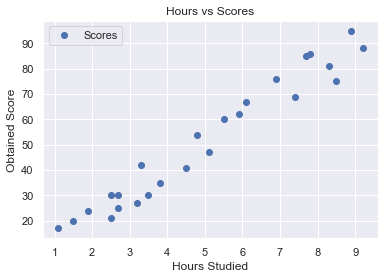

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Obtained Score')  
plt.show()

***From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and obtained score.***

### *Preparing the data*

In [7]:
# Divide the data into attributes and labels.
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

***The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:***

In [8]:
# split this data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [9]:
# print the shape
print(X_train.shape)
print(y_train.shape)

print('-------------------')
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
-------------------
(5, 1)
(5,)


### *Training the Algorithm*
***We have split our data into training and testing sets, and now is finally the time to train our algorithm.***

In [11]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print("The intercept for linear regression model that fit on above dataset", LR.intercept_)

The intercept for linear regression model that fit on above dataset 2.0181600414346974


In [13]:
print("The regression co-efficient values for all features of above dataset", LR.coef_)

The regression co-efficient values for all features of above dataset [9.91065648]


In [14]:
# Plotting the regression line
line = LR.coef_*X+LR.intercept_

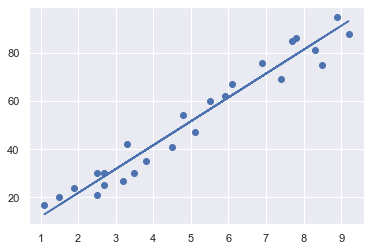

In [15]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### *Making Predictions*
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
# Predicting the scores
y_pred = LR.predict(X_test)

In [17]:
# Compare Actual Vs Predicted
pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
# test with own data
hours = 9.25
own_pred = LR.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


### *Evaluating the model*

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well our model perform on a particular dataset. We have chosen the Root mean squared error. There are many such metrics.

In [19]:
# Calculating the accuracy
from sklearn import metrics

print("MAE value for testing dataset is:", metrics.mean_absolute_error(y_test, y_pred))
print("RMSE value for testing dataset is:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE value for testing dataset is: 4.183859899002975
RMSE value for testing dataset is: 4.647447612100367
